Text(0, 0.5, 'color_intensity')

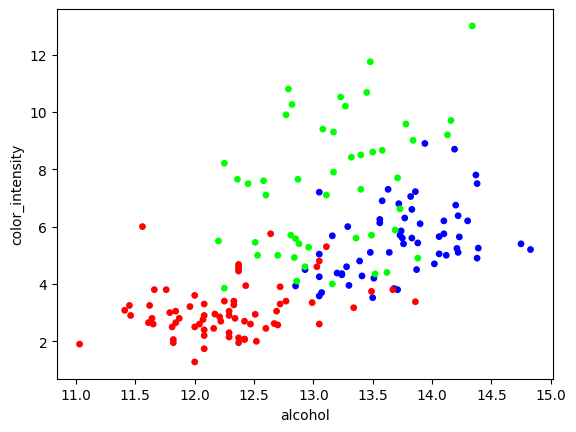

In [1]:
from sklearn import datasets
import matplotlib.pyplot as plt


features = [0, 9]

wine = datasets.load_wine()
data = wine.data[:, features]
target = wine.target

plt.scatter(data[:, 0], data[:, 1], c=target,s=15 , cmap = plt.cm.brg)
plt.xlabel(wine.feature_names[features[0]])
plt.ylabel(wine.feature_names[features[1]])

NORMALIZAÇÃO

In [2]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
data = scaler.fit_transform(data)

Text(0, 0.5, 'color_intensity')

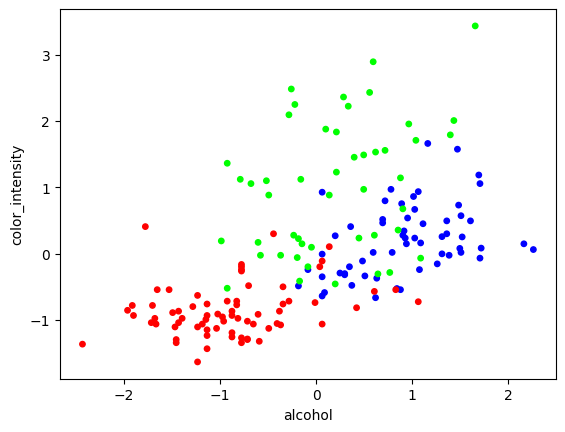

In [3]:
plt.scatter(data[:, 0], data[:, 1], c=target,s=15 , cmap = plt.cm.brg)
plt.xlabel(wine.feature_names[features[0]])
plt.ylabel(wine.feature_names[features[1]])

In [4]:
import torch
from torch import nn

if torch.cuda.is_available():
  device = torch.device('cuda')
else:
  device = torch.device('cpu')

print(device)

input_size = data.shape[1]          #
hidden_size = 32                    #  Valores da rede
out_size = len(wine.target_names)   #

net = nn.Sequential(
    nn.Linear(input_size, hidden_size),
    nn.ReLU(),
    nn.Linear(hidden_size, out_size),
    nn.Softmax()
)

net = net.to(device)

cpu


In [5]:
import numpy as np

def plot_boundary(X, y, model):
  x_min, x_max = X[:, 0].min()-0.1, X[:, 0].max()+0.1
  y_min, y_max = X[:, 1].min()-0.1, X[:, 1].max()+0.1

  spacing = min(x_max - x_min, y_max - y_min) / 100

  XX, YY = np.meshgrid(np.arange(x_min, x_max, spacing),
                       np.arange(y_min, y_max, spacing))

  data = np.hstack((XX.ravel().reshape(-1,1),
                    YY.ravel().reshape(-1,1)))

  # For binary problems
  # db_prob = model(Variable(torch.Tensor(data)).cuda() )
  # clf = np.where(db_prob.cpu().data < 0.5,0,1)

  # For multi-class problems
  db_prob = model(torch.Tensor(data).to(device) )
  clf = np.argmax(db_prob.cpu().data.numpy(), axis=-1)

  Z = clf.reshape(XX.shape)

  plt.contourf(XX, YY, Z, cmap=plt.cm.brg, alpha=0.5)
  plt.scatter(X[:,0], X[:,1], c=y, edgecolors='k', s=25, cmap=plt.cm.brg)

/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1518: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


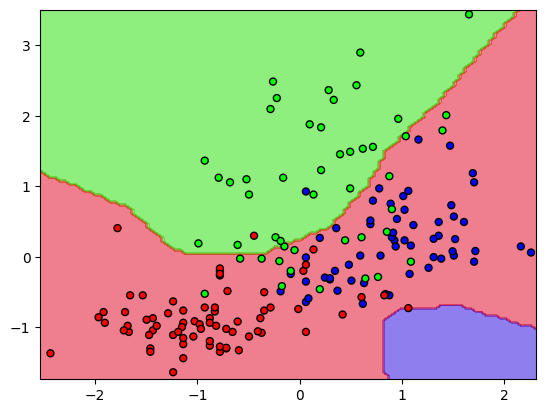

In [6]:
plot_boundary(data, target, net)

In [8]:
from torch import optim

#Função de perda
criterion = nn.CrossEntropyLoss().to(device)

#Otimizador: descida do gradiente
optimizer = optim.SGD(net.parameters(), lr=1e-3)

In [9]:
  X = torch.FloatTensor(data).to(device)
  Y = torch.LongTensor(target).to(device)

/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1518: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


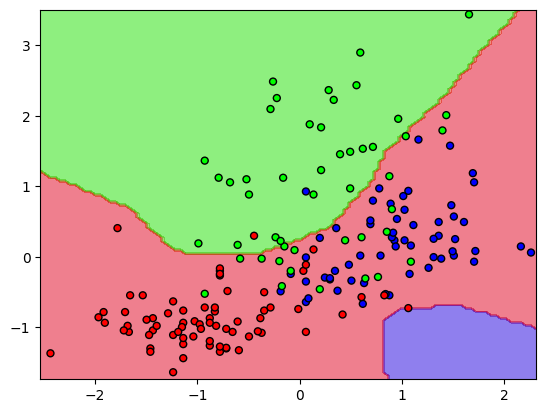

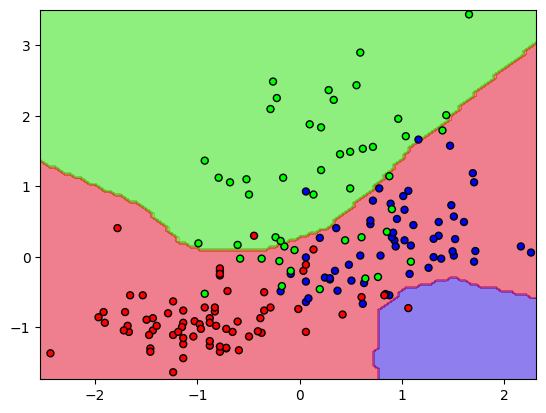

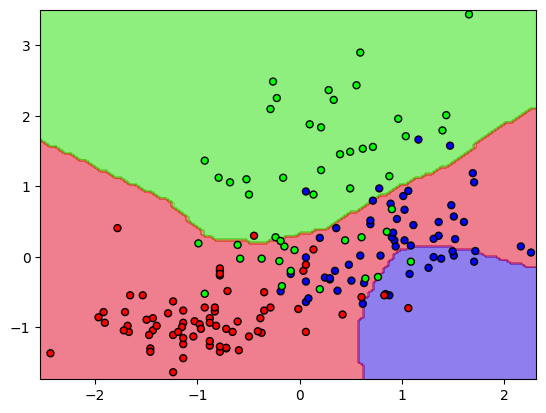

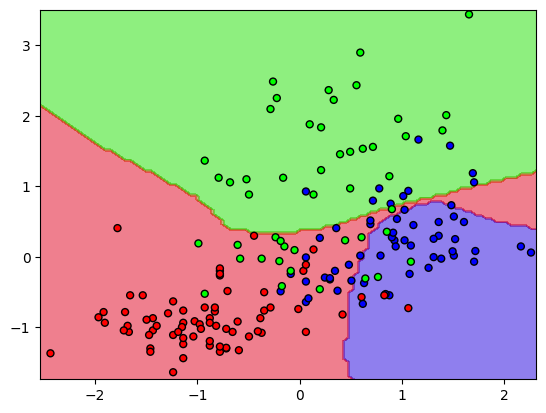

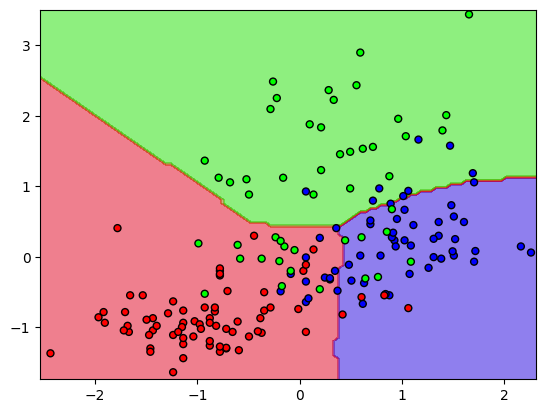

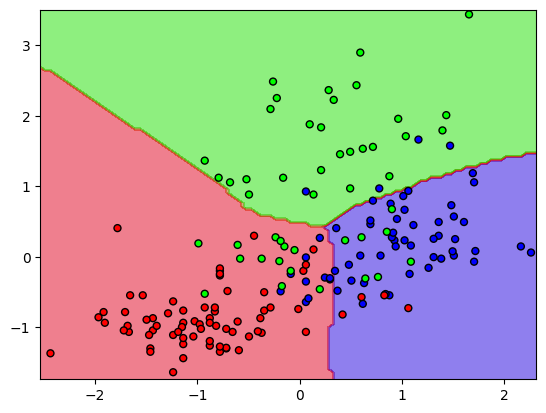

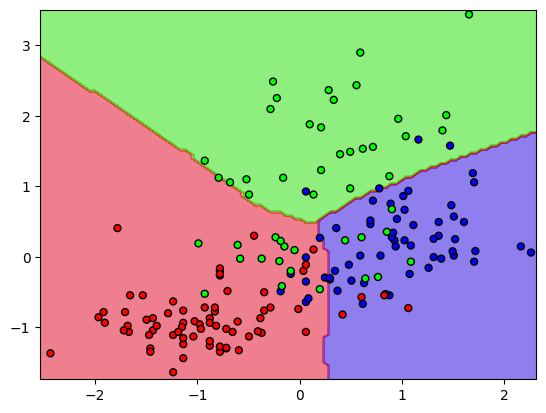

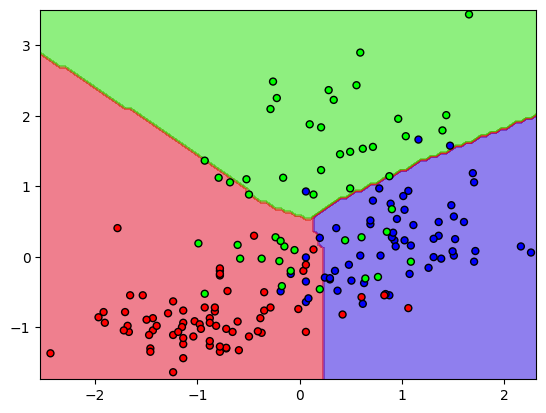

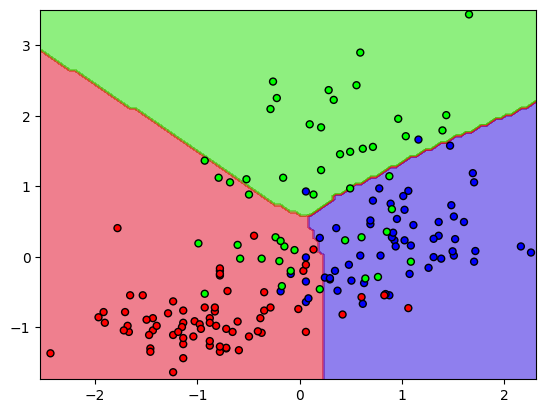

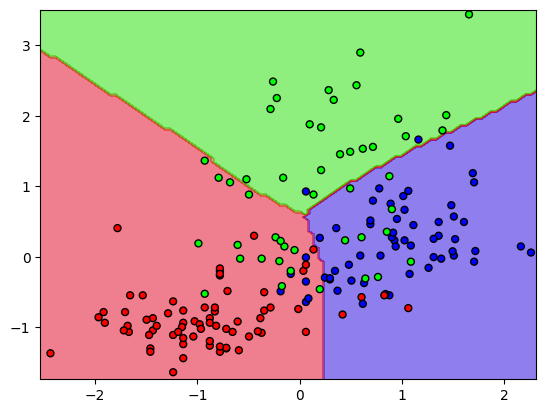

In [10]:
for i in range(100):
  #Forward

  pred = net(X)
  loss = criterion(pred, Y)

  loss.backward()
  optimizer.step()

  if i % 10 == 0:
    plt.figure()
    plot_boundary(data, target, net)

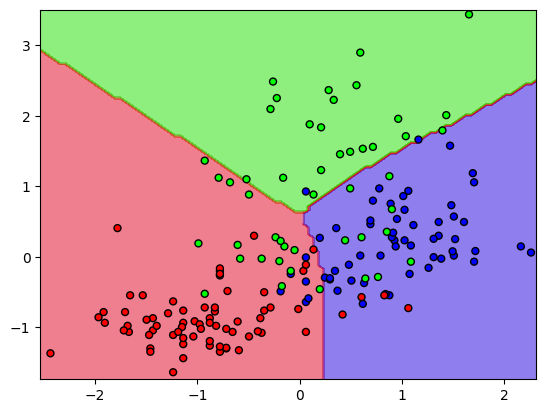

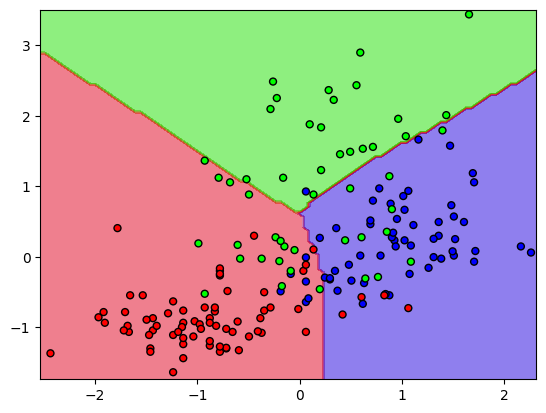

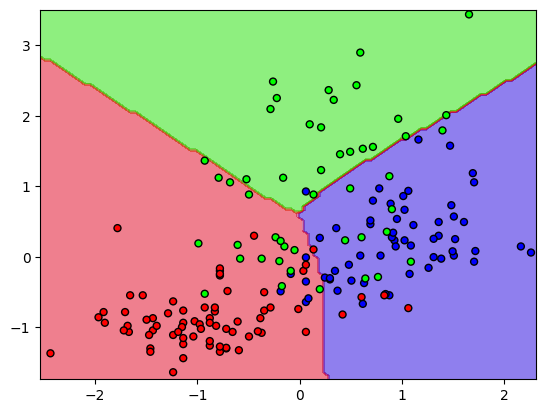

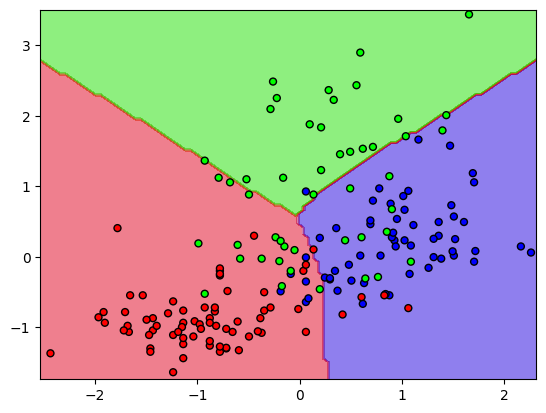

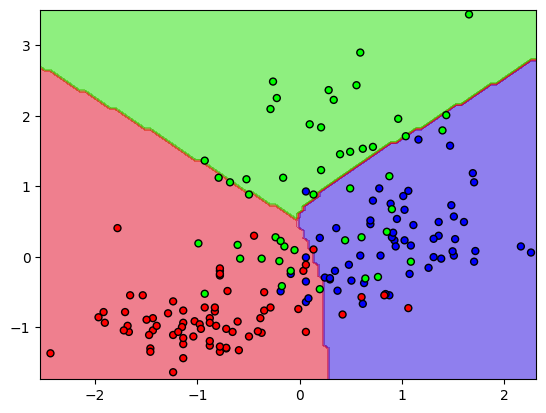

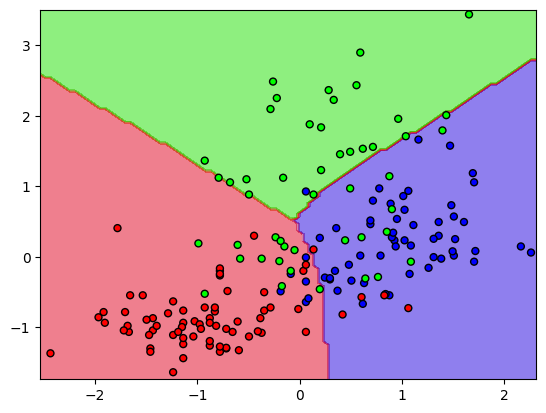

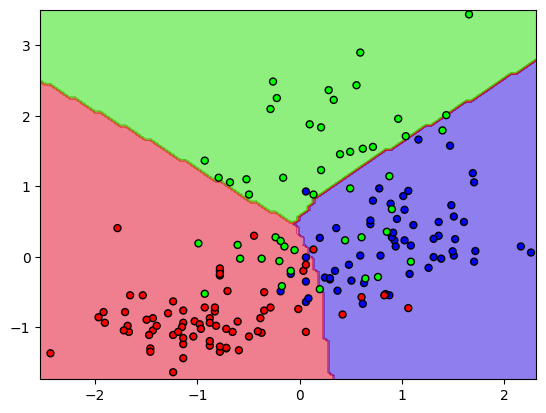

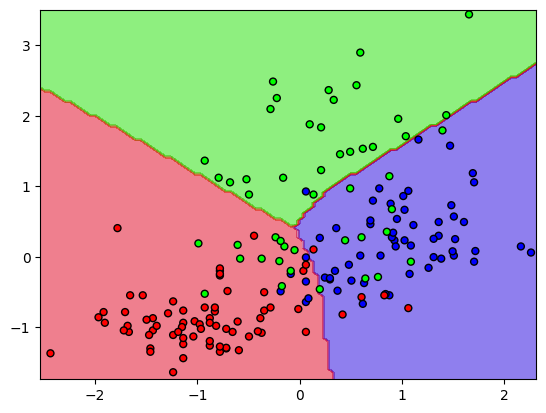

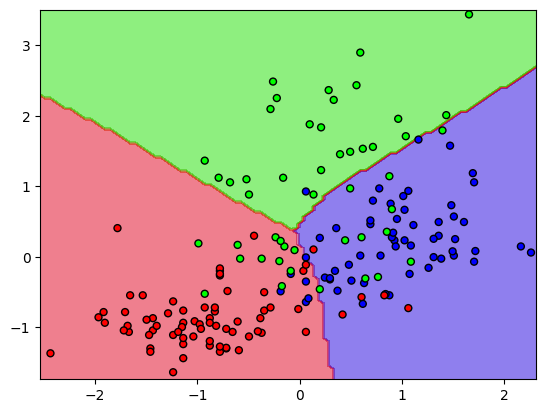

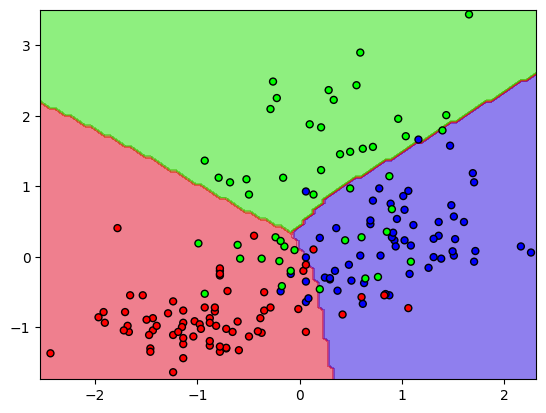

In [11]:
for i in range(100):
  #Forward

  pred = net(X)
  loss = criterion(pred, Y)

  loss.backward()
  optimizer.step()

  if i % 10 == 0:
    plt.figure()
    plot_boundary(data, target, net)